# Titanic Data Analysis Report

Damian Brunold, December 2015 - January 2016

## Introduction

In this report, I analyze a dataset about the sinking of the Titanic. The dataset was provided by [Udacity[1]](https://www.udacity.com/) and originates from the [Kaggle Site[2]](https://www.kaggle.com/). Further information about the iconic sinking of the Titanic can be found e.g. on [Wikipedia[3]](https://en.wikipedia.org/wiki/RMS_Titanic/).

## Questions

It is well known that first class passengers had a much higher survival rate than third class passengers. Here I want to confirm this finding and analyze it a little bit more. Generally, I am interested in how different factors correlate with survival rates. In order to analyze this, I focus on the following three questions:

1. Are the survivor rates different for the three different classes?
2. Are the survivor rates different for men and women?
3. Are the survivor rates different for the three different embarkment sites?

As these data do not originate with an experimental study, we cannot draw causal conclusions and have to restrict our findings to statements of correlations. For example, if we find that third class passengers had lower survival rates than first class passengers, then we cannot state that this is *due* to their different class. It may very well be that there was a confounding factor that was the basis for the difference. For example, it is quite reasonable to assume that the cabins of third class passengers were situated on lower decks and thus it might have been more difficult to reach the life boats. We do not know from these data. We just can state what correlations we find.

## Preparation

Before we can begin to analyze the data, we have to prepare by loading the needed python libraries.

In [33]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Overview of the data

The data is provided as a single CSV file. Lets load the data and get a basic overview of it.

In [3]:

df = pd.read_csv("titanic_data.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that we have 891 passengers and that about 38% survived. The age columns does seem to have quite a lot of missing values.

Lets look at the first five passengers to get a feel for the data:

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Data Wrangling

For our purposes, we need the columns 'Survived', 'Pclass', 'Sex' and 'Embarked'. While the information about 'Age' and 'Fare' would allow to explore interesting other questions, for our questions, they are of no use. Lets make a smaller data frame containing only the data we need.

In [36]:
data = df[['Survived', 'Pclass', 'Sex', 'Embarked']]
print(data.head())
len(data)

   Survived  Pclass     Sex Embarked
0         0       3    male        S
1         1       1  female        C
2         1       3  female        S
3         1       1  female        S
4         0       3    male        S


891

OK. So we have a dataset containing only the data we need. Let us check for missing values:

In [37]:
sum(data.isnull())

Survived    0
Pclass      0
Sex         0
Embarked    2
dtype: int64

Two values for 'Embarked' are missing. Let us exclude these two passengers.

In [39]:
data = data.dropna()
sum(data.isnull())

Survived    0
Pclass      0
Sex         0
Embarked    0
dtype: int64

Very well, there are no missing values.

## Data Analysis

We start our analysis by getting some descriptive statistics of our dataset.

In [9]:
data.describe()

,Survived,Pclass
count,889.000000,889.000000
mean,0.382452,2.311586
std,0.486260,0.834700
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,3.000000
max,1.000000,3.000000


Lets see how many passengers were in each different factor:

In [93]:
data.groupby('Pclass')['Pclass'].count()

Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64

In [90]:
data.groupby('Sex')['Sex'].count()

Sex
female    312
male      577
Name: Sex, dtype: int64

In [92]:
data.groupby('Embarked')['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

### Survival Rates per Class

63% Class 1 survival rate
47% Class 2 survival rate
24% Class 3 survival rate


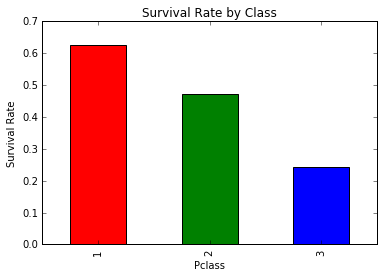

In [198]:
srate_per_class = data.groupby('Pclass')['Survived'].mean()
print('%.0f%% Class 1 survival rate' % (srate_per_class[1] * 100))
print('%.0f%% Class 2 survival rate' % (srate_per_class[2] * 100))
print('%.0f%% Class 3 survival rate' % (srate_per_class[3] * 100))
plt_srate_per_class = srate_per_class.plot(kind='bar', \
                                           color=['red', 'green', 'blue'], \
                                           title='Survival Rate by Class')
label = plt_srate_per_class.set_ylabel('Survival Rate')

So we can answer the first question: the survival rates of the three different classes are quite different.

One suggestion is, that the much higher survival rate of first class passengers is due to preferred evacuation. But it is also possible, that e.g. the third class had cabins lower in the ship and that this fact contributed to their much lower survival rate. In any case, these analyses only show correlation and never causation.

### Survival Rates per Sex

74% female survival rate
19% male   survival rate


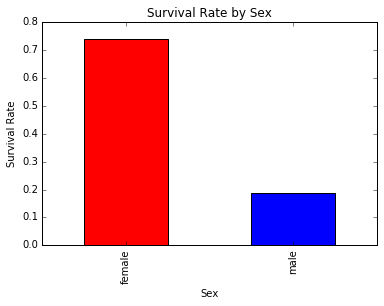

In [200]:
srate_per_sex = data.groupby('Sex')['Survived'].mean()
print("%.0f%% female survival rate" % (srate_per_sex.female * 100))
print("%.0f%% male   survival rate" % (srate_per_sex.male * 100))
plt_srate_per_sex = data2.plot(kind='bar', \
                               color=['red', 'blue'],
                               title='Survival Rate by Sex')
label = plt_srate_per_sex.set_ylabel('Survival Rate')

The second question can be answered: Females had a much, much higher survival rate (74%) than males (19%).

This suggests that the customary 'women and children first' policy was followed to a large extent. In fact, there are reports that at least on one side of the ship men were not allowed to board life boats, even when they were half-empty and no children or women were at hand.

But how do the absolute numbers look like:

68% female


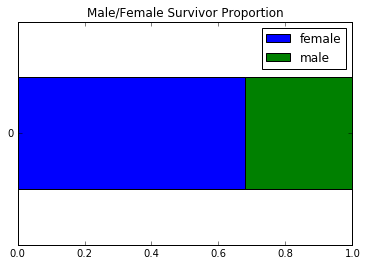

In [203]:
sex_proportion_ = data[data.Survived == 1].groupby('Sex')['Survived'].apply(lambda s: s.count() / sum(data.Survived == 1))
sex_proportion = DataFrame({'female': [sex_proportion_.female], 'male': [sex_proportion_.male]})
print("%.0f%% female" % (sex_proportion.female * 100))
plt_sex_proportion = sex_proportion.plot(kind='barh', \
                                         stacked=True, \
                                         title='Male/Female Survivor Proportion')

So about 68% of survivors were women. The lower percentage is due to the lower proportion of women in the passenger population:

35% female


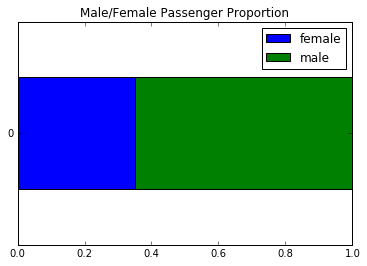

In [204]:
passenger_proportion_ = data.groupby('Sex')['Survived'].apply(lambda s: s.count() / data.Survived.count())
passenger_proportion = DataFrame({'female': [passenger_proportion_.female], 'male': [passenger_proportion_.male]})
print("%.0f%% female" % (passenger_proportion.female * 100))
plt_passenger_proportion = passenger_proportion.plot(kind='barh', \
                                                     stacked=True, \
                                                     title='Male/Female Passenger Proportion')

Only 35% of the passengers were females.

### Survival Rates per Embarkment Site

55% survival rate for Cherbourg
39% survival rate for Queenstown
34% survival rate for Southampton


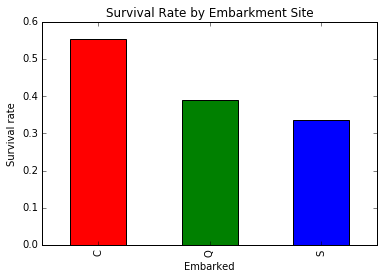

In [208]:
srate_per_site = data.groupby('Embarked')['Survived'].mean()
print('%.f%% survival rate for Cherbourg' % (srate_per_site.C * 100))
print('%.f%% survival rate for Queenstown' % (srate_per_site.Q * 100))
print('%.f%% survival rate for Southampton' % (srate_per_site.S * 100))
plt_srate_per_site = srate_per_site.plot(kind='bar', \
                                         color=['red', 'green', 'blue'], \
                                         title='Survival Rate by Embarkment Site')
label = plt_srate_per_site.set_ylabel('Survival rate')

The answer to our third question is interesting: There is quite a large difference in survival rates depending on the embarkment site.

I did not expect this. I thought that class and sex do have a large influence, but that the site Cherbourg had such a high survival rate related to the other two embarkement sites surprised me.

I want to do two things. Firstly, I want to perform a statistical test to see whether this difference is significant or not. And secondly I want to analyze further why this might happen.

#### Statistical Test

I want to test whether the difference between the survival rates of the different embarkment sites are statistically significant at level $\alpha = 0.05$. As I already know that the survival rate for Cherbourg is higher than for Queenstown, I will perform a one-sided test.

The null and alternative hypothesis are:

$$
H_0: \mu_C - \mu_Q \le 0
$$

$$
H_1: \mu_C - \mu_Q \gt 0
$$

where $\mu_C$ is the mean survival for Cherbourg and $\mu_Q$ is the mean survival for Queenstown.

The population standard deviations are not known. The samples are larger than 30 elements and thus can be assumed to be normal distributed. Therefore, I perform a **one sided t-test at significance level 0.05**.

Since the difference in means for Cherbourg and Southampton is even larger than between Cherbourg and Queenstown, I do not perform a separate test for this case.

In [84]:
sigma = data.Survived.std()
c = data[data.Embarked == 'C'].Survived
q = data[data.Embarked == 'Q'].Survived
x_diff = c.mean() - q.mean()
sigma_diff = sqrt(c.std()**2 / (c.count() - 1) + q.std()**2 / (q.count() - 1))
print("x_diff = %f, sigma_diff = %f" % (x_diff, sigma_diff))
import scipy.stats
t_crit = scipy.stats.t.ppf(0.95, df=(c.count() + q.count() - 2))
print("t_crit = %f" % t_crit)
print("t_test = %f" % (x_diff / sigma_diff))

x_diff = 0.163961, sigma_diff = 0.068257
t_crit = 1.651148
t_test = 2.402121


Since t_test = 2.4 > 1.65 = t_crit the **difference in the means is statistically significant at level $< 0.05$**.

To cross-check this result, I perform the t-test using the appropriate method in scipy.stats.

In [85]:
scipy.stats.ttest_ind(c, q)

Ttest_indResult(statistic=2.4010594208034917, pvalue=0.017100079516725354)

As we can see, the t-value is the same (ignoring numerical inaccurencies) and the (two-tailed) p-value is 0.017.

#### Further analysis related to the Embarkment difference

How are the Pclass distributions for each Embarkment? Does this maybe explain the much higher survival rate of passengers embarked at Cherbourg?

In [218]:
class_cherbourg   = data[data.Embarked == 'C'].groupby('Pclass')['Pclass'].count()
class_queenstown  = data[data.Embarked == 'Q'].groupby('Pclass')['Pclass'].count()
class_southampton = data[data.Embarked == 'S'].groupby('Pclass')['Pclass'].count()


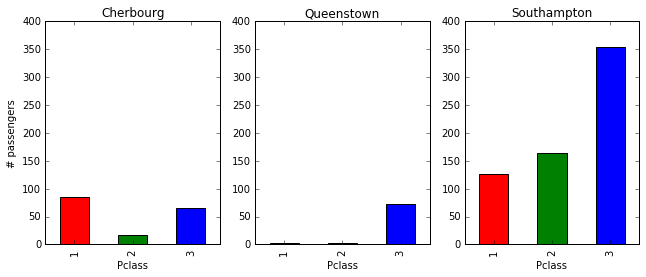

In [249]:
plt.figure(1)
plt.subplots_adjust(right=1.5)
plt.subplot(131)
plt_class_cherbourg = class_cherbourg.plot(kind='bar', \
                                           color=['red', 'green', 'blue'], \
                                           title='Cherbourg')
plt_class_cherbourg.set_ylabel('# passengers')
plt.ylim(0, 400)
plt.subplot(132)
plt_class_queenstown = class_queenstown.plot(kind='bar', \
                                             color=['red', 'green', 'blue'], \
                                             title='Queenstown')
plt.ylim(0, 400)
plt.subplot(133)
plt_class_southampton = class_southampton.plot(kind='bar', \
                                               color=['red', 'green', 'blue'], \
                                               title='Southampton')
plt.ylim(0, 400)
plt.show()

The charts clearly show that in Cherbourg a majority of first class passengers embarked, while in the other cases, the third class passengers constitute the overwhelming majority.

Lets have a look at the survival rate by embarkement site and passenger class

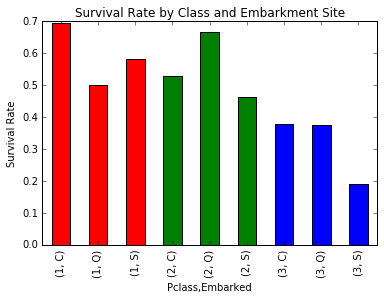

In [252]:
srate_per_site_class = data.groupby(['Pclass', 'Embarked']).mean()
plt_srate_per_site_class = srate_per_site_class.plot(kind='bar', \
                                                     color=['red'] * 3 + ['green'] * 3 +['blue'] * 3, \
                                                     legend=None,\
                                                     title='Survival Rate by Class and Embarkment Site')
label = plt_srate_per_site_class.set_ylabel('Survival Rate')

There seems to be a negative correlation for the passenger class across all embarkement sites.

So this is a reasonable explanation for the difference in survival rates for the different embarkment sites. For each embarkment site, the survival rates tend to drop for higher classes.

## Conclusion

This analysis answered the three initial questions.
- Yes, the survival rates for men and women were dramatically different (female 74%, male 19%).
- Yes, the survival rates for the three classes were also very different (first 63%, second 47%, third 24%).
- Yes, surprisingly, the survival rates for the three embarkment sites differ significantly. This is correlated with different composition of passenger classes in the different embarkment sites.


## Further Questions

A variety of questions to explore come to mind:
- Is the age of the passengers correlated with survival?
- Is the fare correlated with survival?
- Can we utilize the cabin information to gain more information, e.g. did starboard cabins have different survival rates than port side cabins?

## References
[1] https://www.udacity.com/

[2] https://www.kaggle.com/

[3] https://en.wikipedia.org/wiki/RMS_Titanic/